In [78]:
library(dplyr)
library(tidyr)
library(tibble)
library(ggplot2)
library(stringr)
library(ggstream)
library(ggrepel)
library(bbplot)
library('ggh4x')
source('/home//jupyter/BRI_Figures_Final_V2/helper_function/helper_function_IHA.r')

In [79]:
is_dark_color <- function(hex) {
  rgb <- col2rgb(hex)
  
  luminance <- 0.299 * rgb[1,] + 0.587 * rgb[2,] + 0.114 * rgb[3,]
  
  if(luminance < 128){
  
  return('white')
      
  }else{return('black')}
}

In [80]:
color_annotation<-read.csv('../Color_hex_codes/Cell_Type_Color_Annotation_and_Order.csv')
color_vector <- setNames(color_annotation$color, color_annotation$label)

In [81]:
df<-read.csv("03_Get_Counts/SF4_Freq.csv")

In [82]:
df<-df %>%
  dplyr::group_by(pbmc_sample_id) %>%                       
  dplyr::mutate(percentage = (count / sum(count)) * 100) %>% 
  dplyr::group_by(pbmc_sample_id) %>%     
  dplyr::mutate(percentage_clr = clr_transform((percentage))) %>% 
  dplyr::ungroup() %>% as.data.frame(.)

In [83]:
df_subset<-df%>% filter(celltypist_l3 %in% c("Core naive CD8 T cell","CM CD4 T cell"))

In [84]:
selected_celltype<-c("Core naive CD8 T cell",
                "CM CD4 T cell")
df_subset$celltypist_l3<-factor(df_subset$celltypist_l3,levels=selected_celltype)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


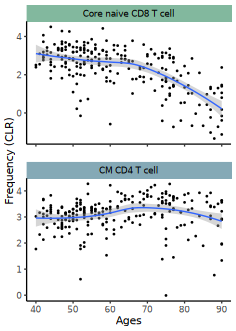

In [97]:
options(repr.plot.width = 50/25.4, repr.plot.height = 70/25.4)

p<-ggplot(df_subset , 
       aes(Ages, percentage_clr)) +
    geom_point(size = 0.5, stroke = 0)+ylab('Frequency (CLR)')+
  theme_bw(base_size=6)+
  theme(
    axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank(),
      strip.background = element_rect(linewidth = 0),
  )  + 
  geom_smooth(se=TRUE,linewidth=0.3)+
facet_wrap2(~celltypist_l3,axes = "all",
            remove_labels = "all",ncol=1,
            scale='free_y')+xlab('Ages')+ 
theme(legend.position="top")
g <- ggplot_gtable(ggplot_build(p))

strips <- which(grepl('strip-', g$layout$name))

pal <- color_vector[celltype_order]
text_color <- sapply(color_vector[celltype_order], is_dark_color)

for (i in seq_along(strips)) {
  k <- which(grepl('rect', g$grobs[[strips[i]]]$grobs[[1]]$childrenOrder))
  l <- which(grepl('titleGrob', g$grobs[[strips[i]]]$grobs[[1]]$childrenOrder))
  g$grobs[[strips[i]]]$grobs[[1]]$children[[k]]$gp$fill <- adjustcolor(pal[i], alpha.f = 0.8)
  g$grobs[[strips[i]]]$grobs[[1]]$children[[l]]$children[[1]]$gp$col <- text_color[i]
}

plot(g)
ggsave('FigureE.pdf',g,width = 50/25.4,height = 70/25.4)
